# Multiple Linear Regression
## Geely Auto Case Study

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.  

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

-
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.
Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- Which variables are significant in predicting the price of a car

- How well those variables describe the price of a car

#### Business Goal 
Model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
CarPrice = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
# Check the head of the dataset
CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the CarPrice dataframe

In [5]:
CarPrice.shape

(205, 26)

In [6]:
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
#No Nulls seen in the data set 

In [8]:
#checking statistic details
CarPrice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 3: Data Preparation

#### Data Cleanup

In [9]:
#remove carID  
CarPrice.drop(['car_ID'], axis =1, inplace = True)

In [10]:
#CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'.
#get Car name 
CarPrice["CarName"] = CarPrice["CarName"].str.replace('-', ' ')
CarPrice["CarName"] = CarPrice.CarName.map(lambda x: x.split(" ", 1)[0])
# As we have some redundant data in carName lets fix it 
CarPrice.CarName = CarPrice['CarName'].str.lower()
CarPrice = CarPrice.rename(columns={'CarName': 'Company'})
CarPrice.Company.unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce', 'renault',
       'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen',
       'vw', 'volvo'], dtype=object)

In [11]:
#we can see variations/spell mistakes in the naming of car.
# cleaning this data
CarPrice['Company'] = CarPrice['Company'].replace(
        ['maxda','porcshce','toyouta','vokswagen','vw'], 
        ['mazda','porsche','toyota','volkswagen','volkswagen'])

#CarPrice['Company'] =CarPrice['Company'].str.replace('vw','volkswagen')
CarPrice.Company.unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
#Deriving the insurance risk rating from symboling
# -1,-2--->Low risk |0--->Medium Risk| 2,3---> High risk

CarPrice['risk rating'] = CarPrice['symboling'].map(lambda x: 'High Risk' if x > 0 else('Medium Risk' if x == 0 else 'Low Risk' ))

In [13]:
#remove symboling  
CarPrice.drop(['symboling'], axis =1, inplace = True)

In [14]:
CarPrice.head()

,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,risk rating
0,alfa,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,High Risk
1,alfa,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,High Risk
2,alfa,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,High Risk
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,High Risk
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,High Risk


In [15]:
CarPrice.nunique()

Company              22
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
risk rating           3
dtype: int64

In [16]:
# Dataset with columns that have two values .converting to 1's and 0's respectively
#fueltype,aspiration,doornumber,enginelocation

CarPrice['fueltype'] = CarPrice['fueltype'].map({'gas': 1, 'diesel': 0})
CarPrice['aspiration'] = CarPrice['aspiration'].map({'std': 1, 'turbo': 0})
CarPrice['doornumber'] = CarPrice['doornumber'].map({'two': 1, 'four': 0})
CarPrice['enginelocation'] = CarPrice['enginelocation'].map({'front': 1, 'rear': 0})

In [17]:
# get the list of variables which we will need to convert into dummies
varlist = CarPrice.select_dtypes(include='object_')
list(varlist.columns.values)

['Company',
 'carbody',
 'drivewheel',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'risk rating']

## Step 2: Visualising the Data

- **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable


#### Visualising Numeric Variables

Let's make a pairplot to see how each of the variable is related to price

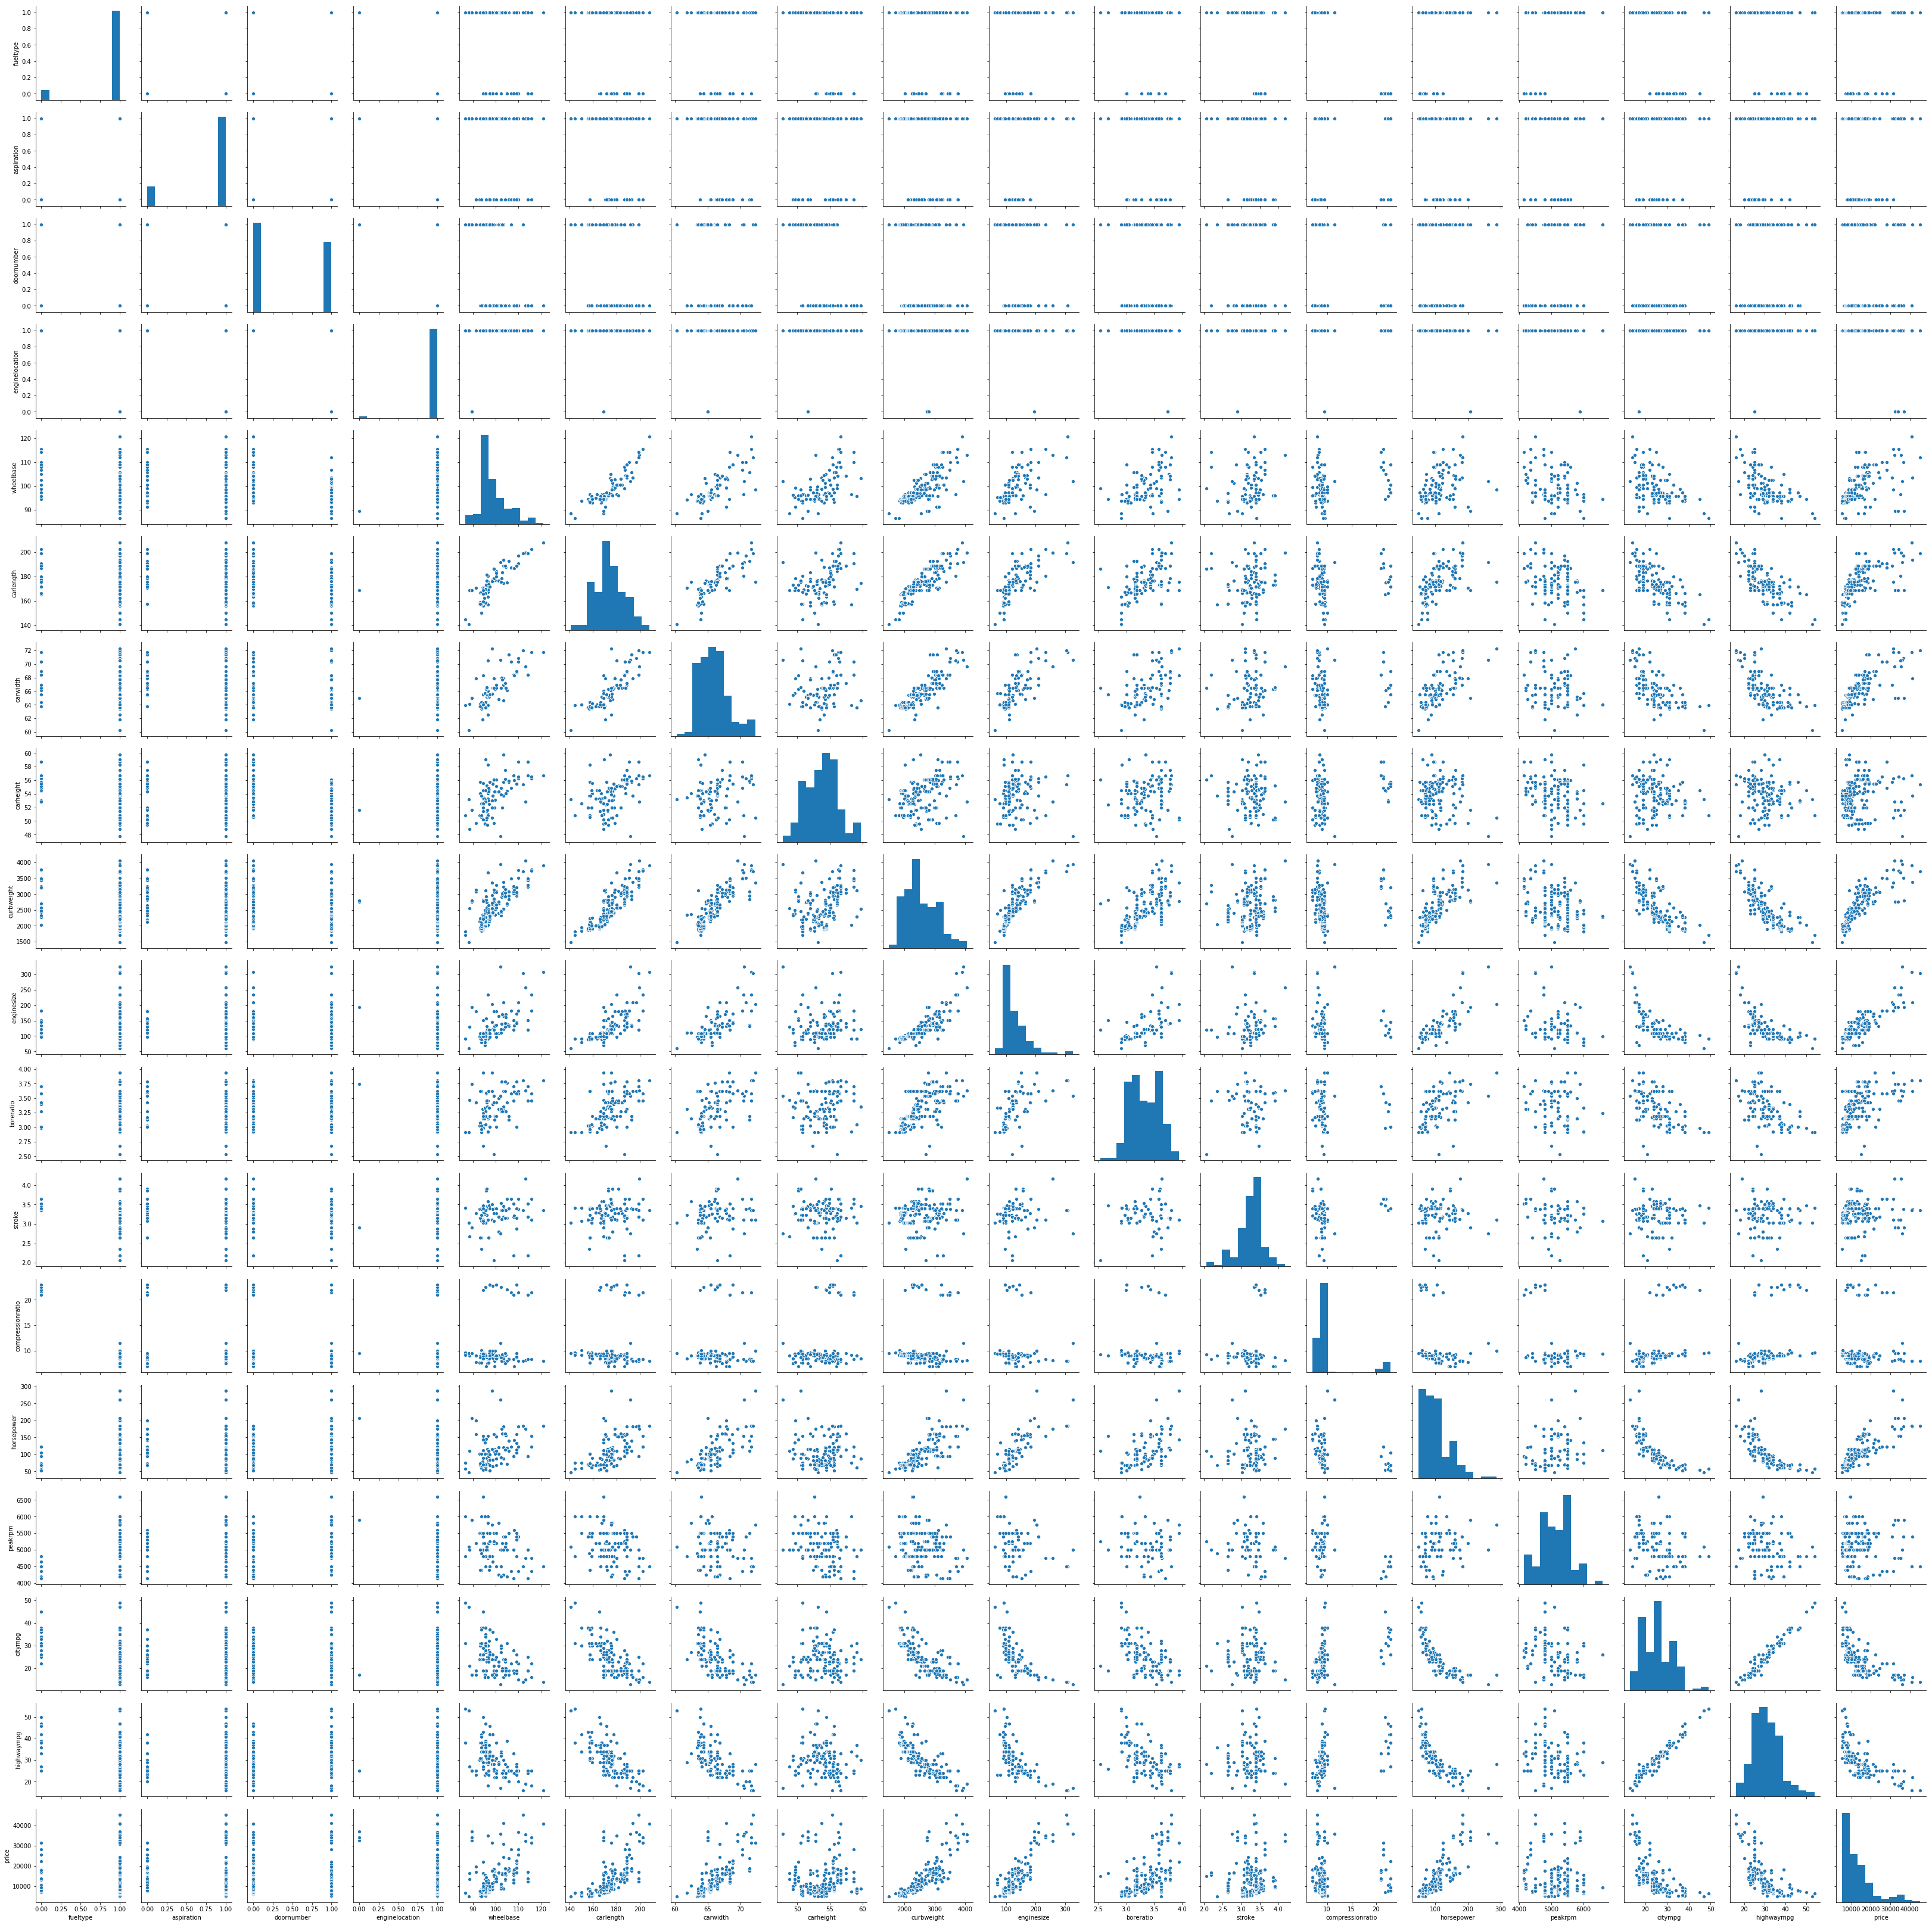

In [18]:
sns.pairplot(CarPrice)
plt.show()

#sns.pairplot(CarPrice, x_vars=['symboling', 'wheelbase', 'carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg'], y_vars='price', kind='scatter')
#plt.show()

In [19]:
#Incorrect entry for engine type 'dohcv'
#CarPrice['enginetype'] =CarPrice['enginetype'].str.replace('dohcv','dohc')

In [20]:
#handling the dummies
# drop the first column
CarPrice= pd.get_dummies(CarPrice,columns=['Company','carbody','drivewheel','enginetype','cylindernumber','fuelsystem','risk rating'], drop_first = True)
CarPrice.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,risk rating_Low Risk,risk rating_Medium Risk
0,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,1,0,0,0,0
1,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,1,0,0,0,0
2,1,1,1,1,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,1,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,1,0,0,0,0
4,1,1,0,1,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,1,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [21]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(CarPrice, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

Using 
1. Min-Max scaling 


In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [25]:
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,risk rating_Low Risk,risk rating_Medium Risk
122,1,1,0,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,...,0,1,0,0,0,0,0,0,0,0
125,1,1,1,1,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,...,0,0,0,0,0,1,0,0,0,0
166,1,1,1,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,...,0,0,0,0,0,1,0,0,0,0
1,1,1,1,1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,...,0,0,0,0,0,1,0,0,0,0
199,1,0,0,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,...,0,0,0,0,0,1,0,0,1,0


In [26]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,risk rating_Low Risk,risk rating_Medium Risk
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000
mean,0.909091,0.818182,0.440559,0.993007,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,...,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.104895,0.349650
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,...,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.307495,0.478536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,...,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [27]:
y_train = df_train.pop('price')
x_train = df_train

### RFE
Recursive feature elimination

In [28]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [29]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [30]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 25),
 ('aspiration', False, 14),
 ('doornumber', False, 49),
 ('enginelocation', True, 1),
 ('wheelbase', False, 17),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 26),
 ('horsepower', False, 15),
 ('peakrpm', False, 16),
 ('citympg', False, 37),
 ('highwaympg', False, 27),
 ('Company_audi', False, 39),
 ('Company_bmw', True, 1),
 ('Company_buick', False, 45),
 ('Company_chevrolet', False, 23),
 ('Company_dodge', False, 20),
 ('Company_honda', False, 22),
 ('Company_isuzu', False, 47),
 ('Company_jaguar', False, 28),
 ('Company_mazda', False, 44),
 ('Company_mercury', False, 54),
 ('Company_mitsubishi', False, 13),
 ('Company_nissan', False, 42),
 ('Company_peugeot', False, 6),
 ('Company_plymouth', False, 19),
 ('Company_porsche', True, 1),
 ('Company_renault', False, 52),
 ('Company_saab', False, 9),
 ('C

In [31]:
#top features selected by RFE
col = x_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'Company_bmw', 'Company_porsche', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [32]:
#Features dropped by after RFE
x_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'Company_audi', 'Company_buick',
       'Company_chevrolet', 'Company_dodge', 'Company_honda', 'Company_isuzu',
       'Company_jaguar', 'Company_mazda', 'Company_mercury',
       'Company_mitsubishi', 'Company_nissan', 'Company_peugeot',
       'Company_plymouth', 'Company_renault', 'Company_saab', 'Company_subaru',
       'Company_toyota', 'Company_volkswagen', 'Company_volvo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuel

### Building model using statsmodel, for the detailed statistics

In [33]:
# Creating X_train dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [34]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

In [35]:
 # Running the linear model
lm = sm.OLS(y_train,x_train_rfe).fit()  

In [36]:
#Let's see the summary of our linear model 1
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           1.21e-64
Time:                        14:25:41   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

In [37]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,230.92
3,curbweight,9.26
4,enginesize,7.23
2,carwidth,4.92
5,boreratio,1.85
7,Company_porsche,1.82
1,enginelocation,1.66
9,cylindernumber_twelve,1.49
10,cylindernumber_two,1.24
6,Company_bmw,1.13


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `cylindernumber_twelve` as it has a very high p-value of `0.511`. Let's go ahead and drop this variables

In [39]:
# Dropping highly correlated variables and insignificant variables

X = x_train_rfe.drop('cylindernumber_twelve', 1,)

In [40]:
# Build a second fitted model after dropping cylinder_twelve
x_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, x_train_lm).fit()

In [41]:
# Print the summary of the model 2
print(lr_2.summary())
#R-squared: 0.912
#Adj. R-squared:0.906

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           1.18e-65
Time:                        14:25:41   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1760 

In [42]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,228.54
3,curbweight,8.64
4,enginesize,5.13
2,carwidth,4.91
5,boreratio,1.85
7,Company_porsche,1.80
1,enginelocation,1.65
9,cylindernumber_two,1.17
6,Company_bmw,1.09
8,cylindernumber_three,1.05


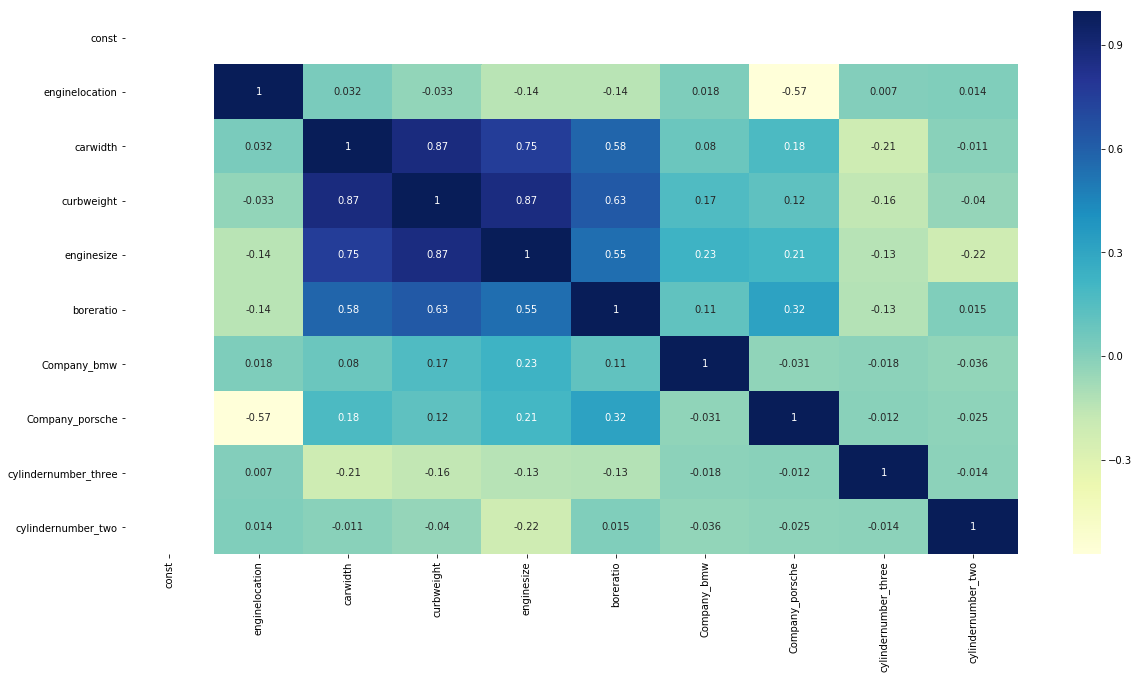

In [43]:
plt.figure(figsize = (20,10))  
sns.heatmap(X.corr(),annot = True,cmap="YlGnBu")
#curbwidth and carwidth are highly corelated (0.87)


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable curbweight and carwidth are highly corelated (0.87) Also the VIF value for curbweight	8.64.

In [44]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('curbweight', 1)

In [45]:
# Build a third fitted model
x_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, x_train_lm).fit()

In [46]:
# Print the summary of the model 3

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           2.01e-63
Time:                        14:25:42   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1849 

In [47]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,228.38
3,enginesize,3.12
2,carwidth,3.08
4,boreratio,1.70
6,Company_porsche,1.67
1,enginelocation,1.64
8,cylindernumber_two,1.14
5,Company_bmw,1.09
7,cylindernumber_three,1.05


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

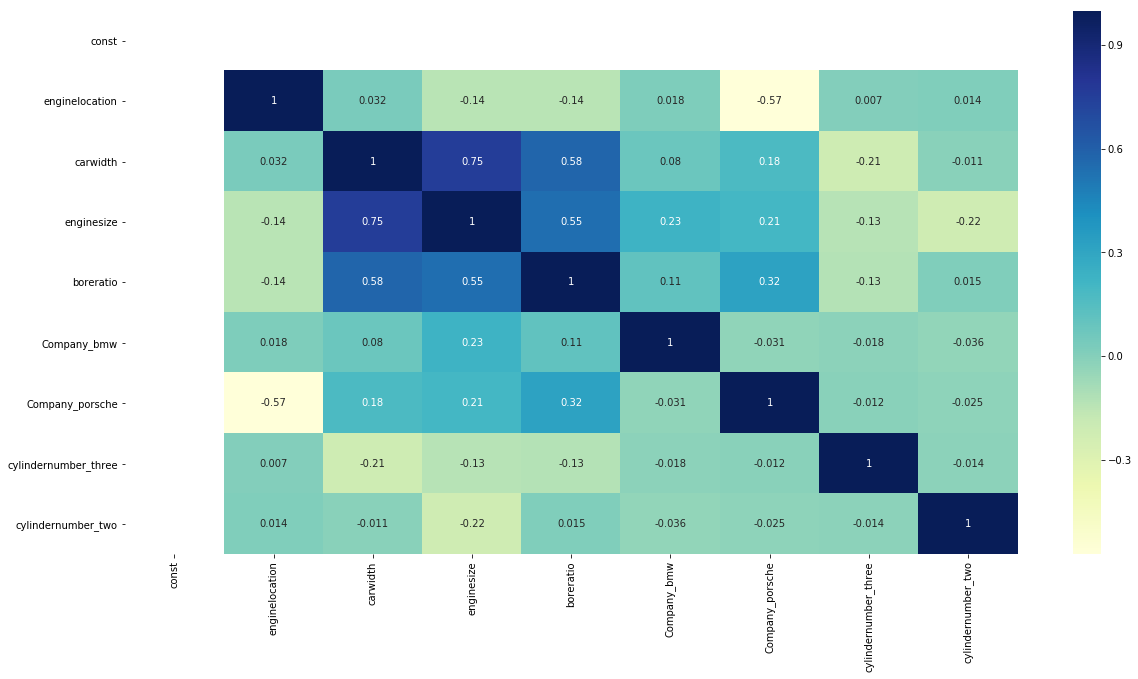

In [49]:
plt.figure(figsize = (20,10))  
sns.heatmap(X.corr(),annot = True,cmap="YlGnBu")

In [48]:
# Dropping carwidth as we can see there is co relation between carwidth and engine size

X = X.drop('boreratio', 1)

In [49]:
# Build a third fitted model
x_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, x_train_lm).fit()

In [50]:
# Print the summary of the model 3

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     171.1
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           7.04e-64
Time:                        14:27:10   Log-Likelihood:                 180.65
No. Observations:                 143   AIC:                            -345.3
Df Residuals:                     135   BIC:                            -321.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1702 

In [51]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,226.38
3,enginesize,3.02
2,carwidth,2.86
1,enginelocation,1.64
5,Company_porsche,1.59
7,cylindernumber_two,1.13
4,Company_bmw,1.09
6,cylindernumber_three,1.05


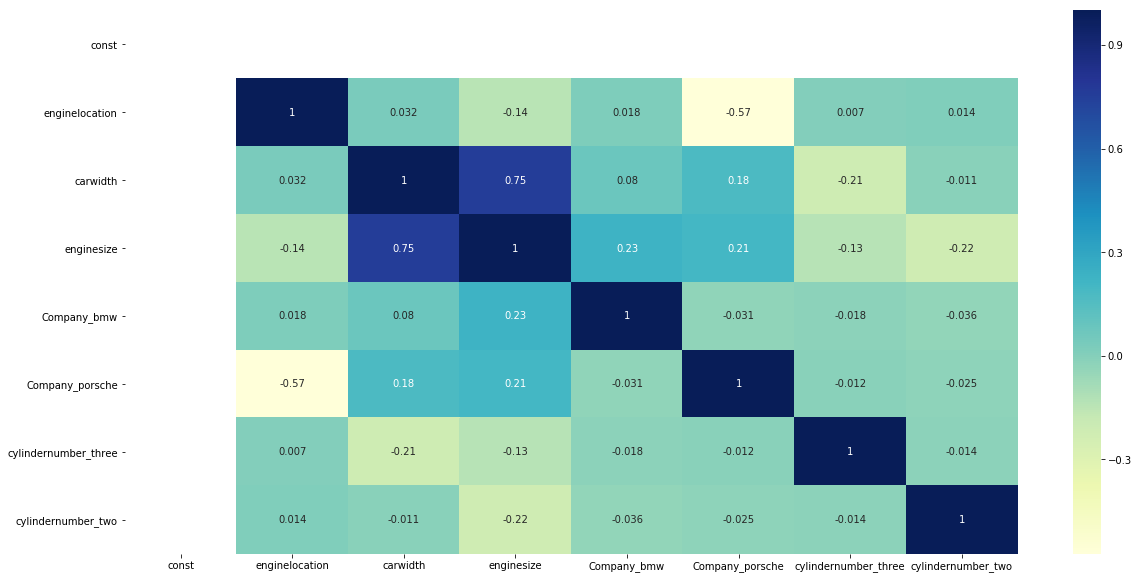

In [52]:
plt.figure(figsize = (20,10))  
sns.heatmap(X.corr(),annot = True,cmap="YlGnBu")

In [53]:
# Dropping carwidth as we can see there is co relation between carwidth and engine size

X = X.drop('Company_porsche', 1)

In [54]:
# Build a third fitted model
x_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, x_train_lm).fit()

In [55]:
# Print the summary of the model 3

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           1.62e-64
Time:                        14:33:36   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2478 

In [56]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,156.08
3,enginesize,3.02
2,carwidth,2.75
6,cylindernumber_two,1.12
4,Company_bmw,1.09
1,enginelocation,1.08
5,cylindernumber_three,1.05


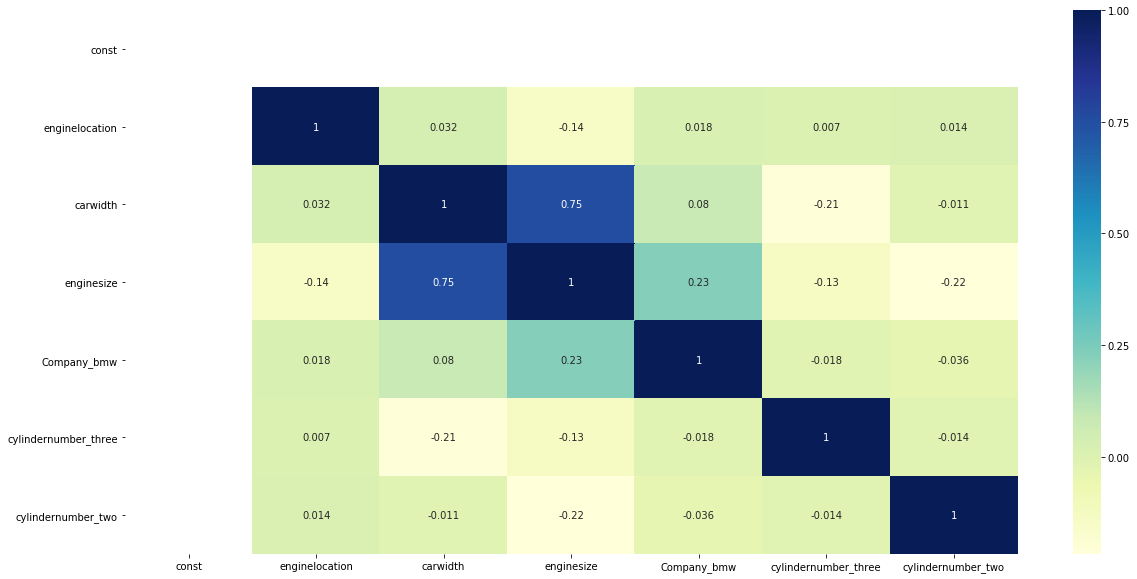

In [73]:
plt.figure(figsize = (20,10))  
sns.heatmap(X.corr(),annot = True,cmap="YlGnBu")

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [58]:
y_train_price = lr_5.predict(x_train_lm)

Text(0.5,0,'Errors')

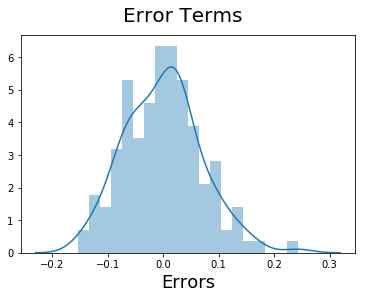

In [59]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [60]:
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [61]:
df_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,risk rating_Low Risk,risk rating_Medium Risk
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.887097,0.822581,0.435484,0.967742,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,...,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129,0.161290,0.274194
std,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,...,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000,0.370801,0.449749
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,...,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,...,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [62]:
CarPricetest=pd.DataFrame()
CarPricetest['Price']=df_test.price

In [63]:
y_test = df_test.pop('price')
X_test = df_test

In [64]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [65]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'Company_audi', 'Company_buick',
       'Company_chevrolet', 'Company_dodge', 'Company_honda', 'Company_isuzu',
       'Company_jaguar', 'Company_mazda', 'Company_mercury',
       'Company_mitsubishi', 'Company_nissan', 'Company_peugeot',
       'Company_plymouth', 'Company_renault', 'Company_saab', 'Company_subaru',
       'Company_toyota', 'Company_volkswagen', 'Company_volvo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'risk rating_Low Risk',
       'risk rating_Medium Risk','cylindernumber_twelve','curbweight','boreratio','Company_porsche'], axis = 1)

In [67]:
# Making predictions using the fourth model

y_pred_m4 = lr_5.predict(X_test_m4)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0,0.5,'y_pred')

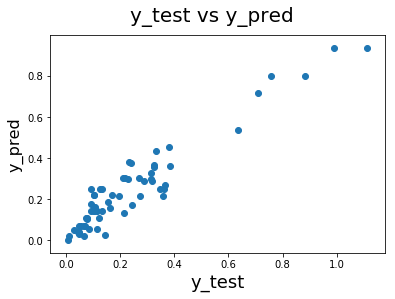

In [68]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [69]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(CarPricetest.Price, y_pred_m4)
r_squared = r2_score(CarPricetest.Price, y_pred_m4)

In [70]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.00527297023224048
r_square_value : 0.9013443522816859


Text(0,0.5,'Price')

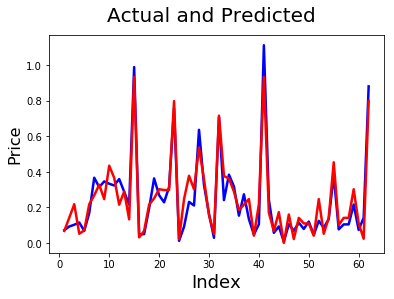

In [71]:
#Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,CarPricetest.Price, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_m4, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)                               # Y-label

Text(0,0.5,'Actual Price-Predicted Price')

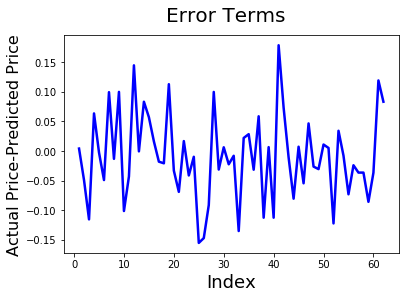

In [72]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,CarPricetest.Price-y_pred_m4, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Actual Price-Predicted Price', fontsize=16)                # Y-label